In [575]:
#Lucas Ross 3 Mar. 2023

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [576]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

df = pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Part 1: Exploratory Data Analysis

In [577]:
print(f"The dataframe is {df.shape[0]} rows by {df.shape[1]} columns")
print(df.dtypes) #most columns are categorical

The dataframe is 45211 rows by 17 columns
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


In [578]:
print(df.isna().sum()) #no null values :>

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [579]:
print(df.describe(include="all").T) #5-point statistical summary

             count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN

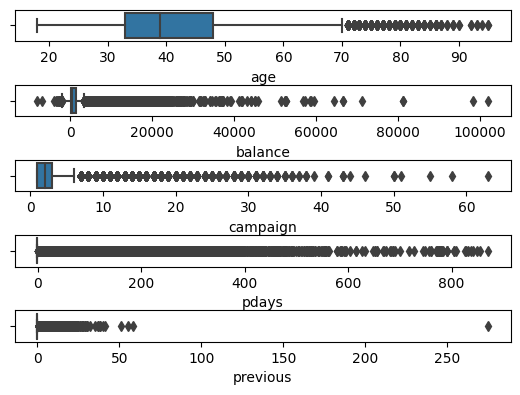

In [580]:
#check for outliers in all the numeric columns
numeric = ["age", "balance", "campaign", "pdays", "previous"]

i = 1
for col in numeric:
    plt.subplot(len(numeric) * 2, 1, i * 2) #multiple by 2 to increase height of each subplot 
    sns.boxplot(data=df, x=col)
    i += 1

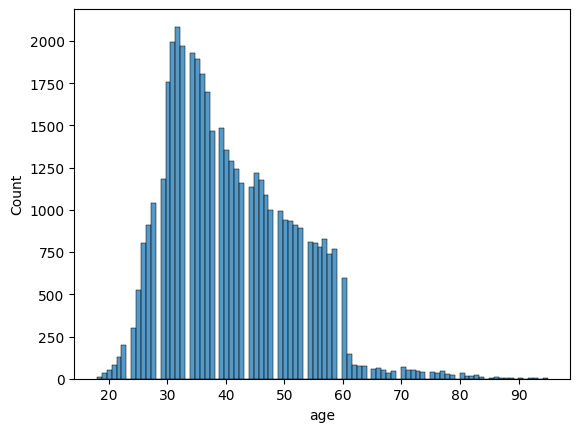

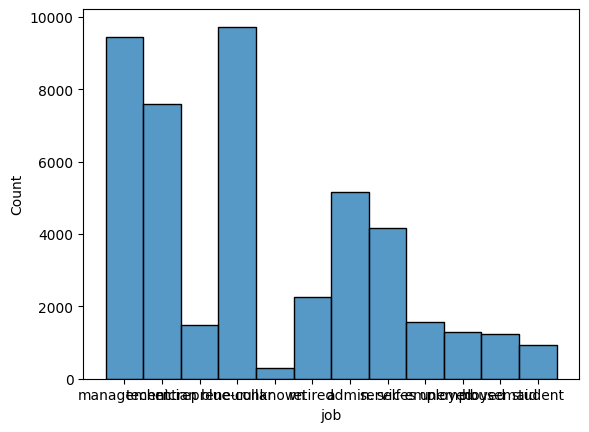

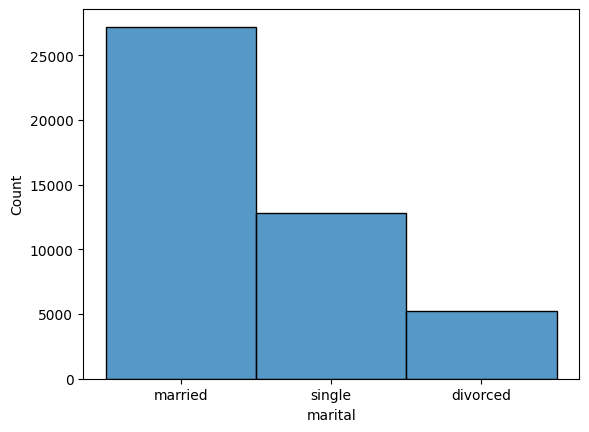

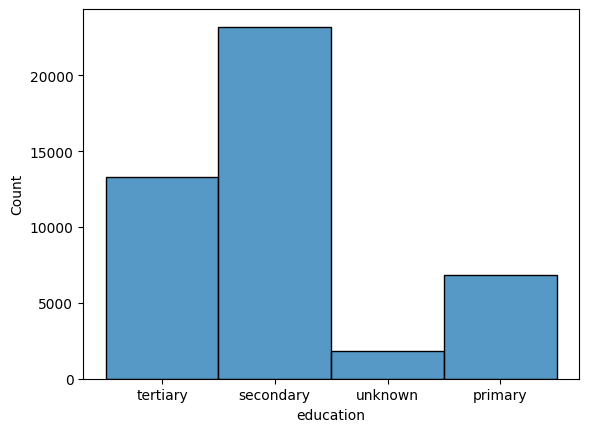

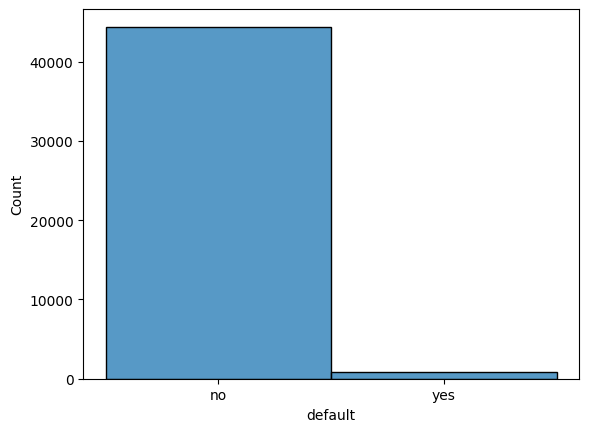

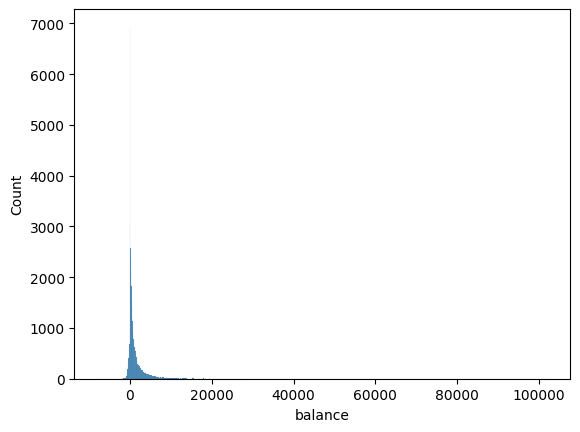

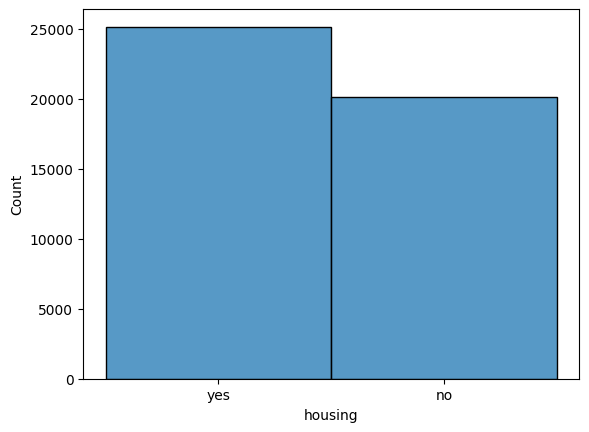

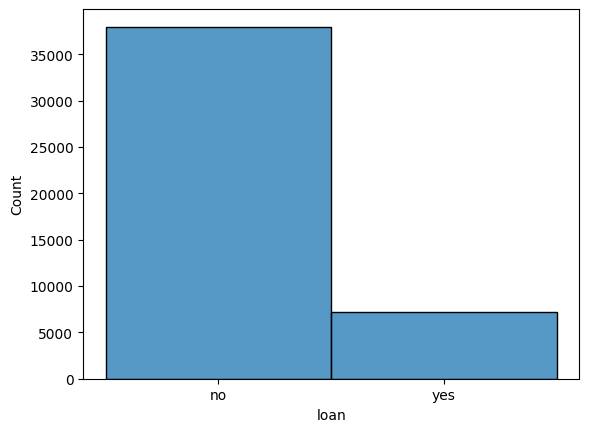

In [581]:
#get distribution of bank client data
important = ["age", "job", "marital", "education", "default", "balance", "housing", "loan"]
for col in important:
    sns.histplot(data=df, x=col)
    plt.show()

# Part 2: Data Cleaning

In [582]:
#drop columns that wouldnt matter for data analysis
df.drop(["contact", "day", "month", "duration"], axis=1, inplace=True)
print(df.shape)
df.head(5)

(45211, 13)


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,unknown,no


one-hot encode the following categorical columns:
- job
- marital
- education
- default
- housing
- loan
- poutcome
- target

In [583]:
categorical = ["job", "marital", "education", "default", "housing", "loan", "poutcome", "Target"]
df2 = pd.DataFrame() #this will hold all the dummy columns

for i in categorical:
    dummies = pd.get_dummies(data=df[i])
    if len(dummies.columns) == 2: #if theres only 2 categories then drop the first one
        dummies.drop([dummies.columns[0]], axis=1, inplace=True)
    for j in dummies.columns: #add each category to the df
        df2[i + "_" + j] = dummies[j]
    df.drop([i], axis=1, inplace=True) #drop the categorical column from the df

df = pd.concat([df, df2], axis=1) #add all dummy cols to the df
df

,age,balance,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
1,44,29,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,33,2,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
3,47,1506,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
4,33,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
45207,71,1729,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
45208,72,5715,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
45209,57,668,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [584]:
#lets check how many true values are in each column
for col in df2.columns:
    print(col)
    print(df2[col].value_counts().get(1))
    print("")

job_admin.
5171

job_blue-collar
9732

job_entrepreneur
1487

job_housemaid
1240

job_management
9458

job_retired
2264

job_self-employed
1579

job_services
4154

job_student
938

job_technician
7597

job_unemployed
1303

job_unknown
288

marital_divorced
5207

marital_married
27214

marital_single
12790

education_primary
6851

education_secondary
23202

education_tertiary
13301

education_unknown
1857

default_yes
815

housing_yes
25130

loan_yes
7244

poutcome_failure
4901

poutcome_other
1840

poutcome_success
1511

poutcome_unknown
36959

Target_yes
5289



In [585]:
#theres a lot of unknown values for poutcome so lets drop the column
df.drop(["poutcome_failure", "poutcome_other", "poutcome_success", "poutcome_unknown"], axis=1, inplace=True)

# Part 3: Logistic Regression

In [586]:
x = df.drop(["Target_yes"], axis=1)
y = df["Target_yes"] #target varaible = whether or not the client subscribed to a term deposit

In [587]:
#split the data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [588]:
#make the log model
logmodel = LogisticRegression(max_iter=1000, C=0.3)

In [589]:
#fit the model
logmodel.fit(xtrain, ytrain)

LogisticRegression(C=0.3, max_iter=1000)

In [590]:
#make predictions
predictions = logmodel.predict(xtest)

In [591]:
#get accuracy score
a1 = accuracy_score(ytest, predictions) #88.4 accuracy%
a1

0.8847685048658213

In [592]:
#run 10 test cases
scores = [] #keeps track of every accuracy score

for i in range(0, 10):
    xtestn = xtest.sample(n=100, random_state=i)
    ytestn = ytest.sample(n=100, random_state=i)
    predictionsn = logmodel.predict(xtestn)

    #new accuracy score
    a = accuracy_score(ytestn, predictionsn)
    print(f"test case {i} accuracy score: {a}")

    scores.append(a)

print("")

avg = np.mean(scores) #get average of all test scores
print(f"average accuracy score: {avg}") #88.4% --> almost exact same as original test!
print(f"original accuracy score: {'%.3f' % a1}")

test case 0 accuracy score: 0.83
test case 1 accuracy score: 0.9
test case 2 accuracy score: 0.82
test case 3 accuracy score: 0.88
test case 4 accuracy score: 0.93
test case 5 accuracy score: 0.87
test case 6 accuracy score: 0.92
test case 7 accuracy score: 0.89
test case 8 accuracy score: 0.89
test case 9 accuracy score: 0.91

average accuracy score: 0.884
original accuracy score: 0.885
